<style>
pre{
    background-color: inherit;
    }
</style>
<h1>Data exploration</h1>

<h2 id="Table-of-contents">Table of contents</h2>
<ul>
    <li><a href="#Preparation">Preparation</a></li>
    <li><a href="#Imports">Imports</a></li>
    <li><a href="#Dataset">Dataset</a></li>
    <li><a href="#Feature-description">Feature description</a></li>
    <li><a href="#Analysing-'SalePrice'">Analysing 'SalePrice'</a></li>
    <li><a href="#Distribution">Distribution</a></li>
    <li><a href="#Correlation">Correlation</a></li>
    <li><a href="#Data-types-of-the-selected-features">Data types of the selected features</a></li>
    <li><a href="#Feature-comparison">Feature comparison</a></li>
    <li><a href="#Feature-correlation-plots">Feature correlation plots</a></li>
    <li><a href="#Trends-+-seasonality">Trends + seasonality</a></li>
    <li><a href="#Search-for-normality">Search for normality</a></li>
</ul>

<h2 id="Preparation">Preparation</h2>
<p>To prepare for this challenge I have followed the university material, the shared data analysis udemy course and Kaggle challanges to familiarize with analysing and visualization techniques.</p>

<h2 id="Imports">Imports</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h2 id="Dataset">Dataset</h2>
The dataset I used to put my knowledge into practice is the cleaned <a href="https://git.fhict.nl/I437101/iot_da_ml_challenges/-/tree/master/da/challenges/data-cleaning-challenge/data">Ames Housing Dataset</a> from the last challenge. This dataset origin is from <a href="https://www.kaggle.com/prevek18/ames-housing-dataset">Kaggle</a>. Its features description can be found <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt">here</a>.


In [3]:
df = pd.read_csv("data/ames_no_missing_data.csv")
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

<h3 id="Feature-description">Feature description</h3>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

In [32]:
# output the content of the feature description
with open('data/data_description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<h2 id="Analysing-'SalePrice'">Analysing 'SalePrice'</h2>
<p>The feature that I am thinking of predicting at the end of the challenges and that I base all my assumptions on is the sales price. To get a visual understanding of this variable I am going to have a look at its frequency distribution.</p>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

In [86]:
df['SalePrice'].describe()

count      2925.000000
mean     180815.537436
std       79951.696564
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [102]:
sale_price_median = df['SalePrice'].median()
sale_price_mode = df['SalePrice'].mode()
formated_sale_price_median_mode = "Sale price median: "+str(sale_price_median)+"\n"+"Sale price mode: "+str(sale_price_mode)
print(formated_sale_price_median_mode)

Sale price median: 160000.0
Sale price mode: 0    135000
dtype: int64


From the descriptive statistics, I can see that the mean value is higher than the median value, and mode is the highest value of the three implying that the shape of the data will turn out positively skewed.

<h3 id="Distribution">Distribution</h3>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

In [5]:
# figure custom setting for a better visualization
sns.set(style='darkgrid')

<h4>Rugplot</h4>

<AxesSubplot:xlabel='SalePrice'>

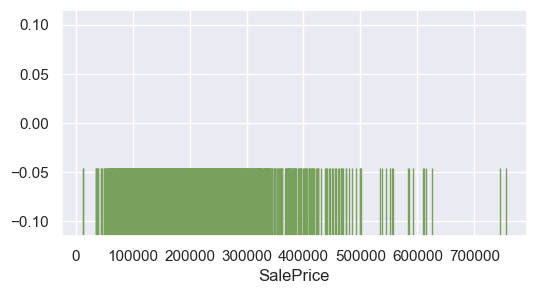

In [55]:
plt.figure(figsize=(6,3),dpi=100)
sns.rugplot(x='SalePrice',data=df,height=0.3,color='#7aa05d')

<h4>Histogram</h4>

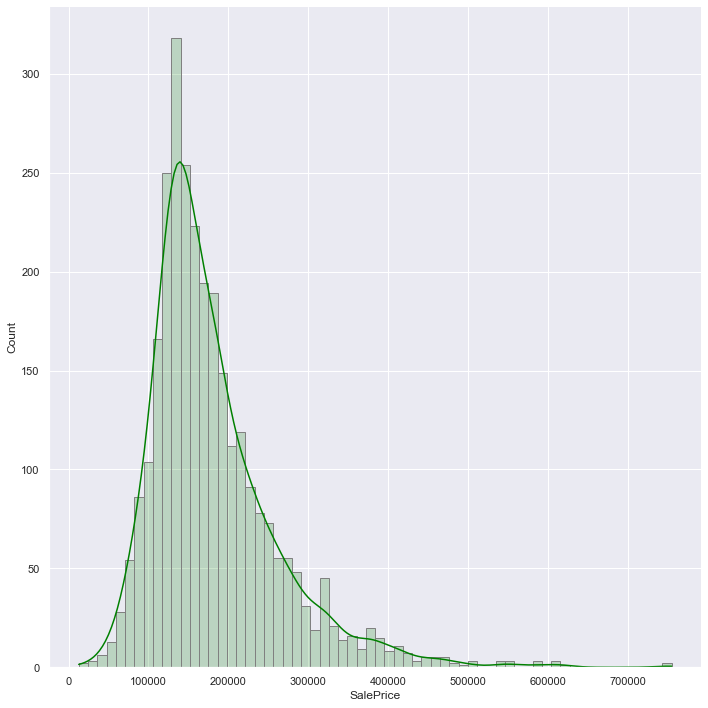

In [84]:
sns.displot(df['SalePrice'],
            color='green',
            edgecolor='gray',
            linewidth=1,
            kde=True,
            height=10,
            alpha=0.2)

<p>As suspected the shape of the data in the histogram shows that it is positively skewed meaning that the results are bent towards the lower side. This shape is not desirable for the distribution as this high level of shrewdness can cause misleading results.</p>

In [104]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.741521
Kurtosis: 5.104676


<p>The skewness value confirms that the data shape is positively skewed. For a normal distribution, the skewness should be around 0.</p>
<p>Becouse the shape of the data is tall and thin, and the kurtosis value is bigger than 3 the distribution is leptokurtic. This high value means that the data can contain heavy outliers.</p>

<h2 id="Correlation">Correlation</h2>
<p>To understand the data, we can look at each variable and try to understand their meaning and relevance to this problem. Although this gives the best results, looking at each variable is time-consuming, so to narrow my selection I'm going to select the features with the highest correlation with the selling price.</p>
<p>During the last challenge, I used only pandas to view and inspect the correlation values for a specific feature. This time I'm going to create a heatmap to better visualize the correlation between all features but also a scatterplot for each selected feature with the sale price.</p>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

<AxesSubplot:>

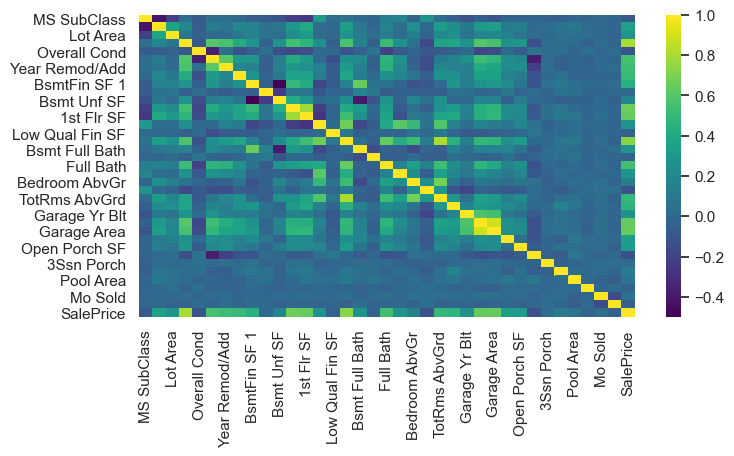

In [120]:
plt.figure(figsize=(8,4),dpi=100)
corr = df.corr()
sns.heatmap(corr,cmap="viridis")

In [119]:
# in order to determine the strongest correlation I'm going to descending sort the reuturned series
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.802637
Gr Liv Area        0.727279
Total Bsmt SF      0.660983
Garage Cars        0.648488
1st Flr SF         0.645635
Garage Area        0.644368
Year Built         0.559165
Full Bath          0.546645
Year Remod/Add     0.533733
Mas Vnr Area       0.508340
TotRms AbvGrd      0.500022
Fireplaces         0.476368
BsmtFin SF 1       0.450331
Lot Frontage       0.358216
Wood Deck SF       0.328102
Open Porch SF      0.317582
Half Bath          0.285440
Bsmt Full Bath     0.276513
Lot Area           0.270507
2nd Flr SF         0.270267
Garage Yr Blt      0.253742
Bsmt Unf SF        0.183251
Bedroom AbvGr      0.144007
Screen Porch       0.112094
Pool Area          0.071835
Mo Sold            0.034926
3Ssn Porch         0.032201
BsmtFin SF 2       0.005947
Misc Val          -0.019329
Yr Sold           -0.030612
Bsmt Half Bath    -0.036024
Low Qual Fin SF   -0.037686
MS SubClass       -0.085028
Overall Cond      -0.101730
Kitchen AbvGr     -0

The selected features are: Overall Quality, Gr Liv Area, Total Bsmt SF, Garage Area and Year Built
I am going to have a look at the features and determine which one are categorical and which ones are numerical

<h2 id="Data-types-of-the-selected-features">Data types of the selected features</h2>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

<h3>Numerical features</h3>

In [11]:
df['Overall Qual']


0       6
1       5
2       6
3       7
4       5
       ..
2920    6
2921    5
2922    5
2923    5
2924    7
Name: Overall Qual, Length: 2925, dtype: int64

In [10]:
df['Gr Liv Area']

0       1656
1        896
2       1329
3       2110
4       1629
        ... 
2920    1003
2921     902
2922     970
2923    1389
2924    2000
Name: Gr Liv Area, Length: 2925, dtype: int64

In [7]:
df['Total Bsmt SF']

0       1080.0
1        882.0
2       1329.0
3       2110.0
4        928.0
         ...  
2920    1003.0
2921     864.0
2922     912.0
2923    1389.0
2924     996.0
Name: Total Bsmt SF, Length: 2925, dtype: float64

In [8]:
df['Overall Qual']

0       6
1       5
2       6
3       7
4       5
       ..
2920    6
2921    5
2922    5
2923    5
2924    7
Name: Overall Qual, Length: 2925, dtype: int64

In [9]:
df['Garage Area']

0       528.0
1       730.0
2       312.0
3       522.0
4       482.0
        ...  
2920    588.0
2921    484.0
2922      0.0
2923    418.0
2924    650.0
Name: Garage Area, Length: 2925, dtype: float64

In [12]:
df['Year Built']

0       1960
1       1961
2       1958
3       1968
4       1997
        ... 
2920    1984
2921    1983
2922    1992
2923    1974
2924    1993
Name: Year Built, Length: 2925, dtype: int64

<h3>Categorical data</h3>
Looking closely at the OveralQual and YearBuilt variables I notice that although they are numerical variables both of them are categorical by nature.

In [58]:
df['Overall Qual'] = df['Overall Qual'].apply(str)

<h2 id="Feature-comparison">Feature comparison</h2>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

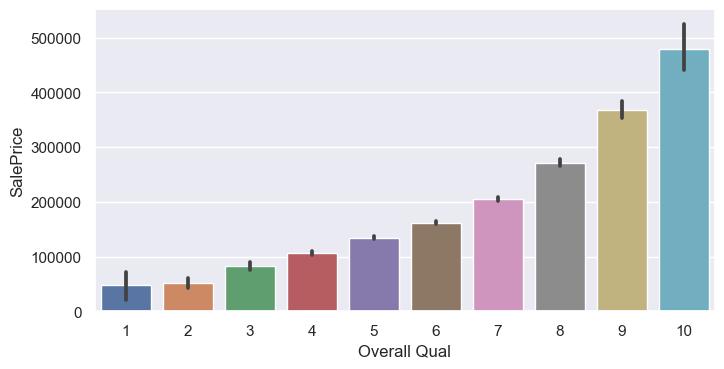

In [25]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x="Overall Qual", y="SalePrice", data=df,order = ['1','2','3','4','5','6','7','8','9','10'])

From the feature comparison of the price by the overall quality I can see the trend that as the quality rises, the price rises as well.

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

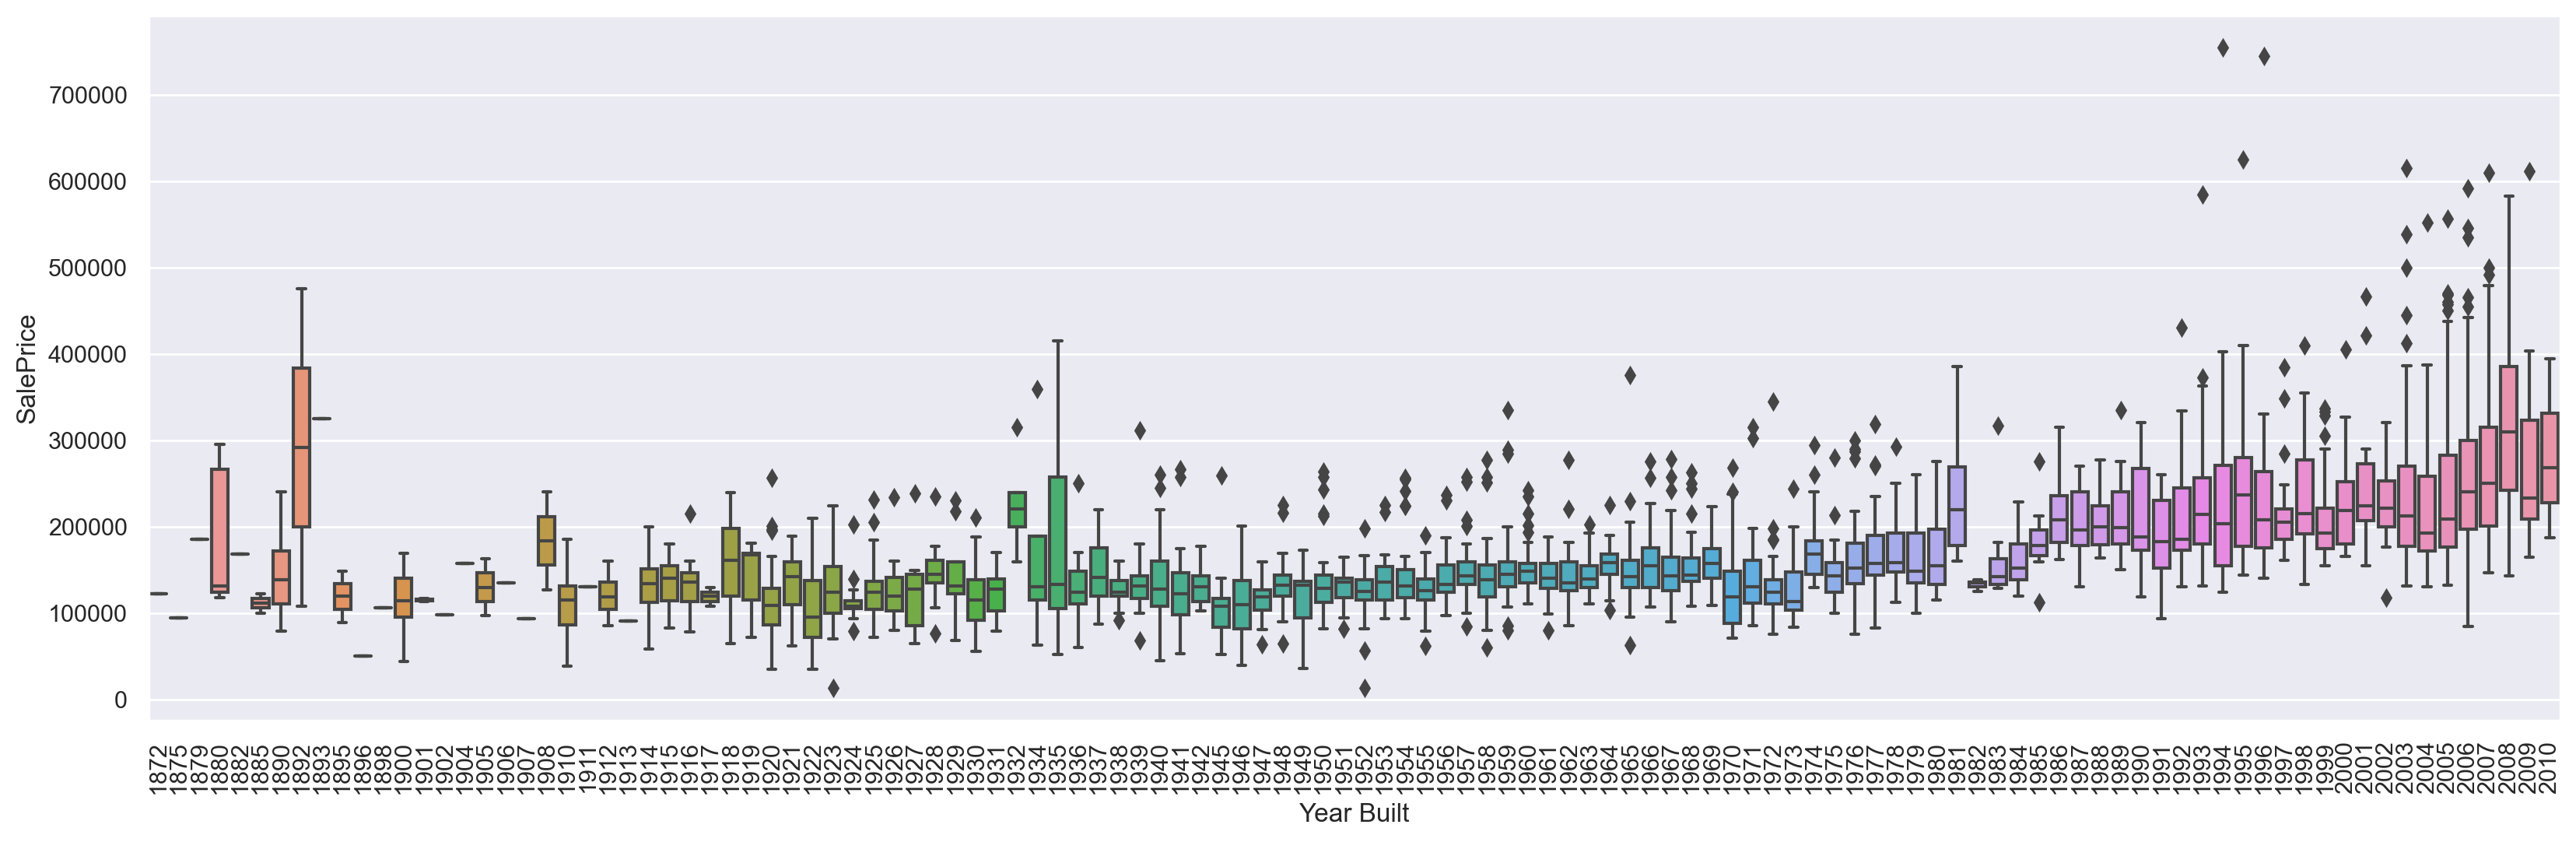

In [95]:
plt.figure(figsize=(20,6),dpi=200)
plt.xticks(rotation=90)
sns.boxplot(x="Year Built", y="SalePrice",data=df)

From the following plot we can deduct that old houses sell at lower price then newer ones.

<h2 id="Feature-correlation-plots">Feature correlation plots</h2>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

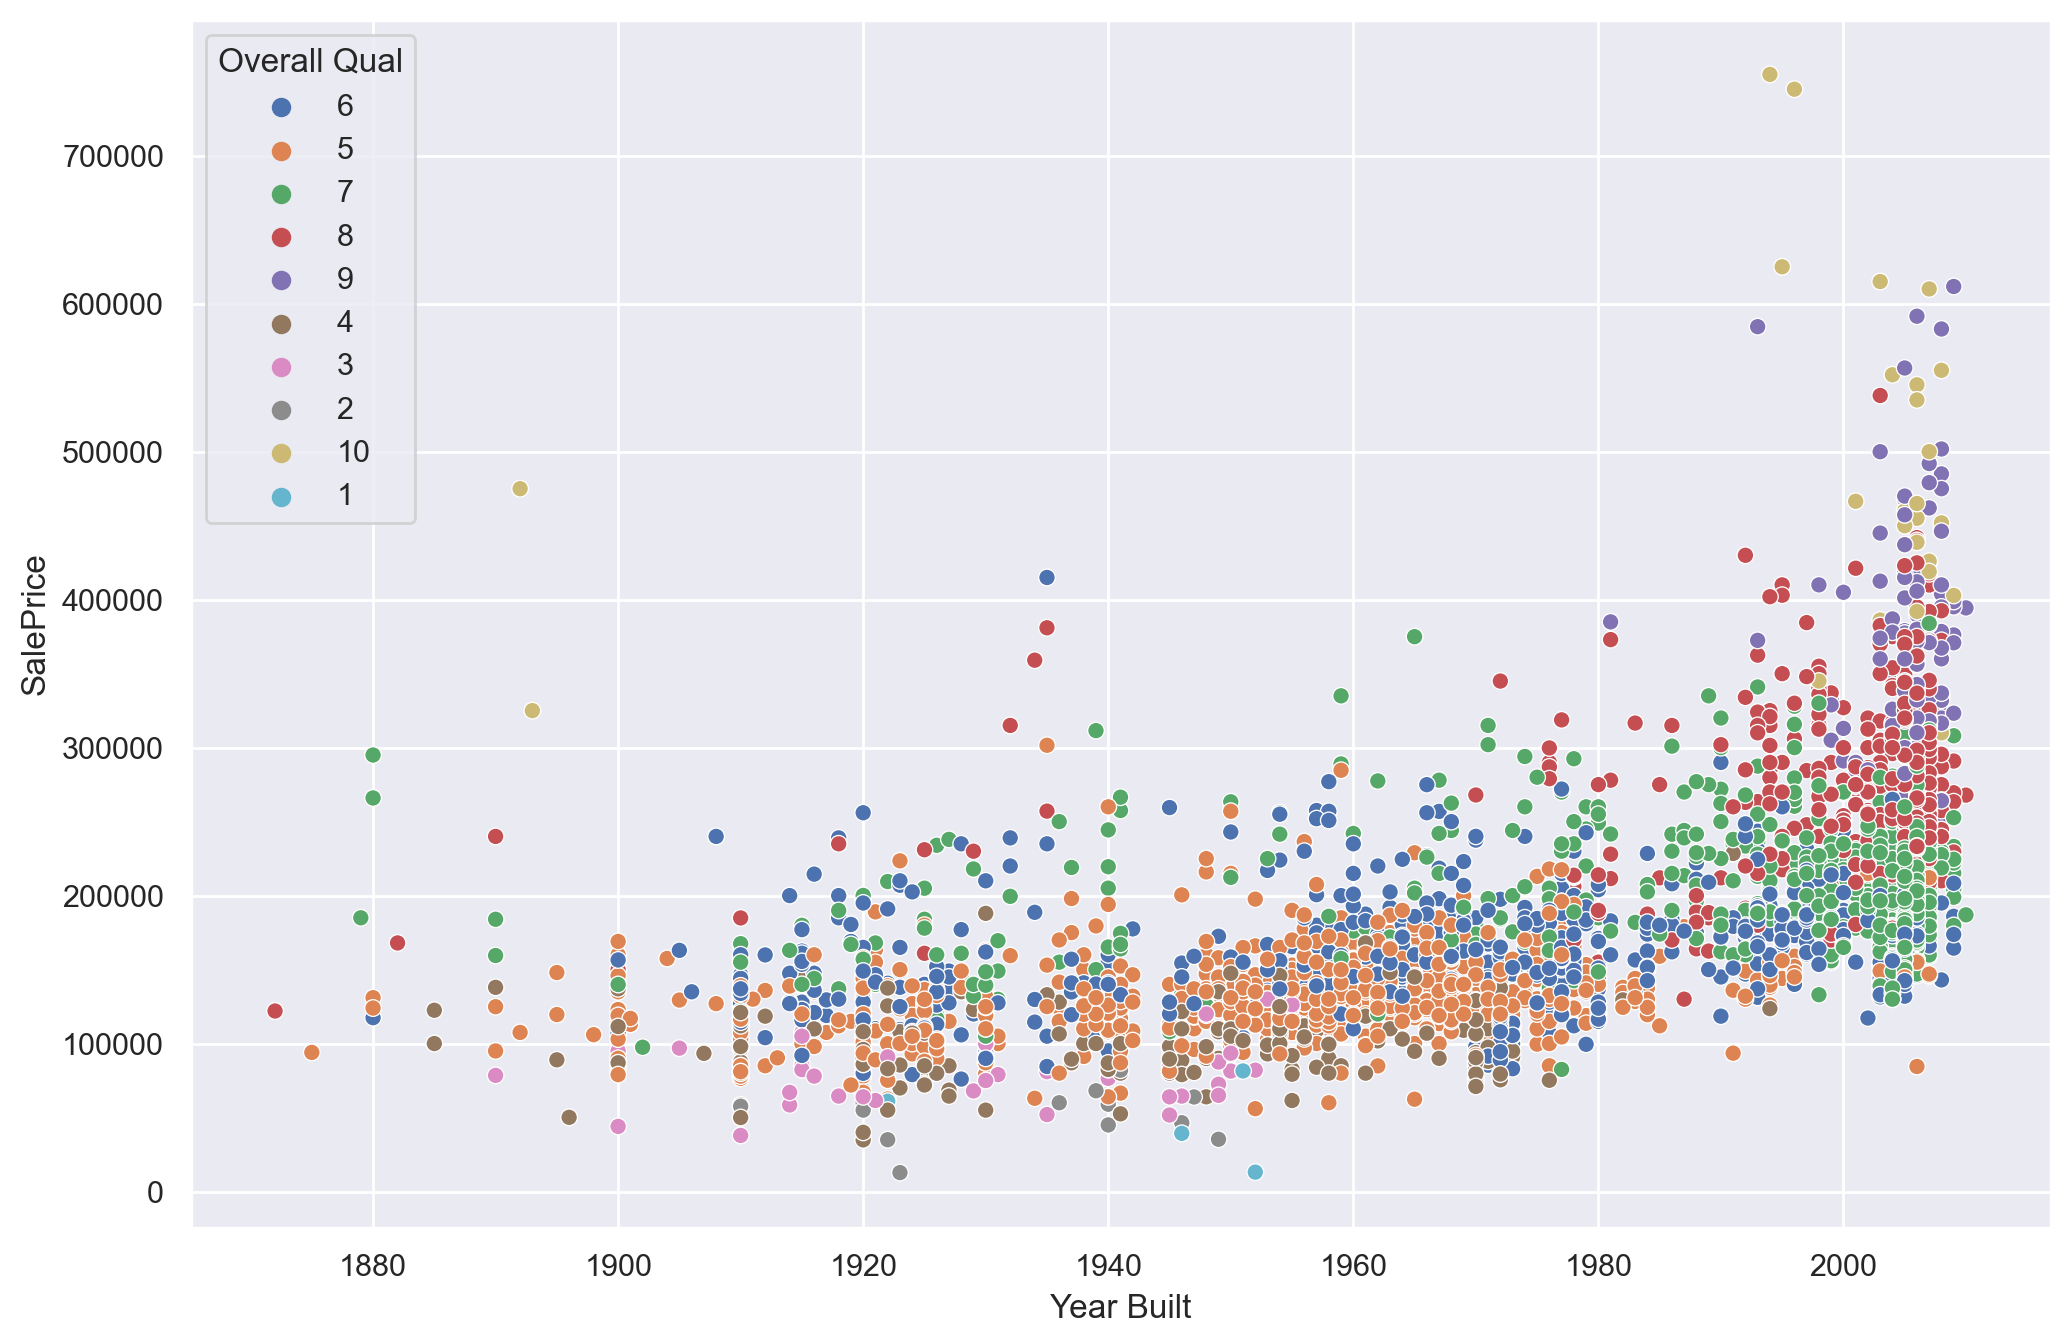

In [62]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Year Built',y='SalePrice',data=df,hue='Overall Qual')

As in the comparison plot for the price by year built we can see that the newer the house the higher the price. I can also see that starting from around the year 1990 till after 2000 the overall quality started playing a big role as around the year 2000 the highest selling houses have a higher quality.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

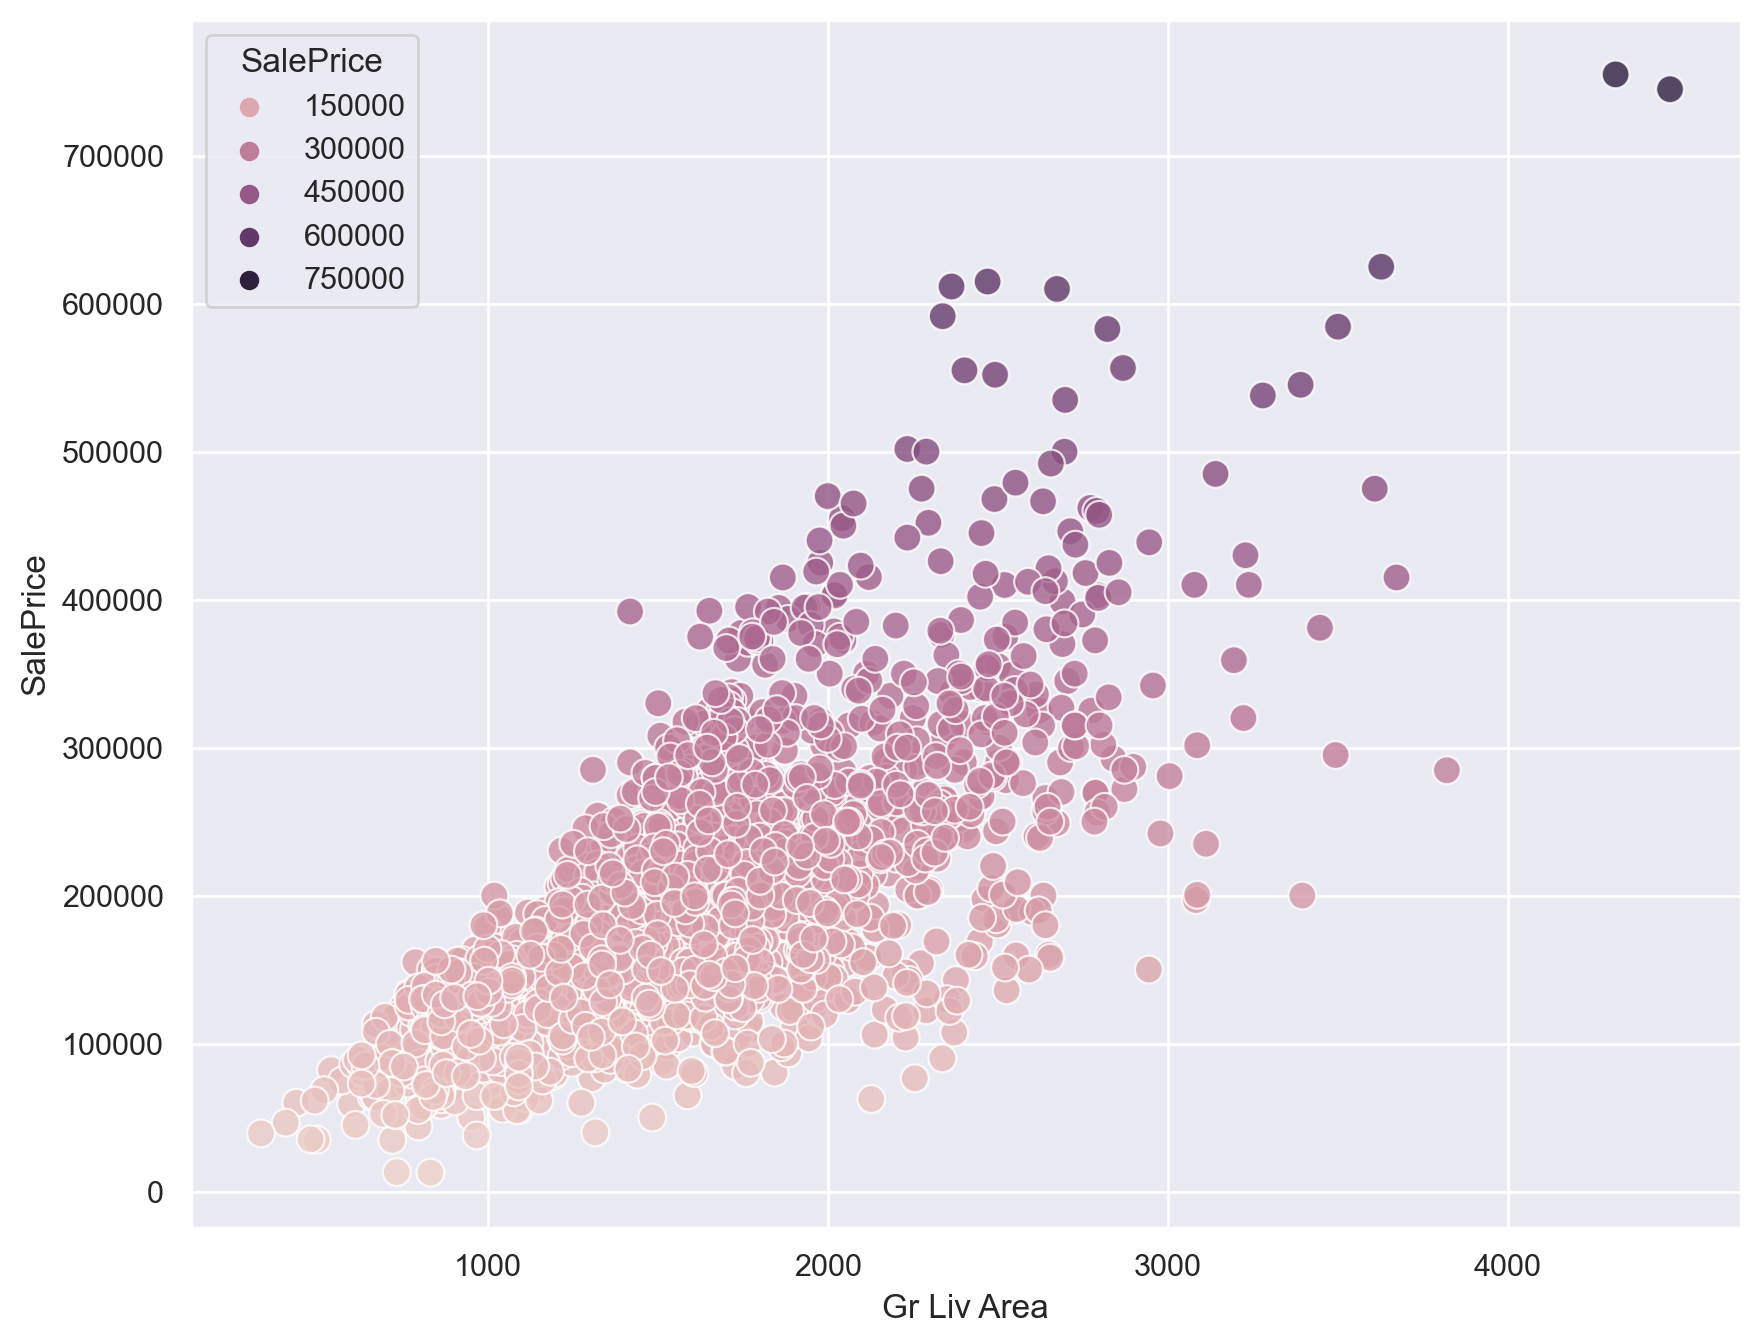

In [71]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df,hue='SalePrice',alpha=0.8,s=100)

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

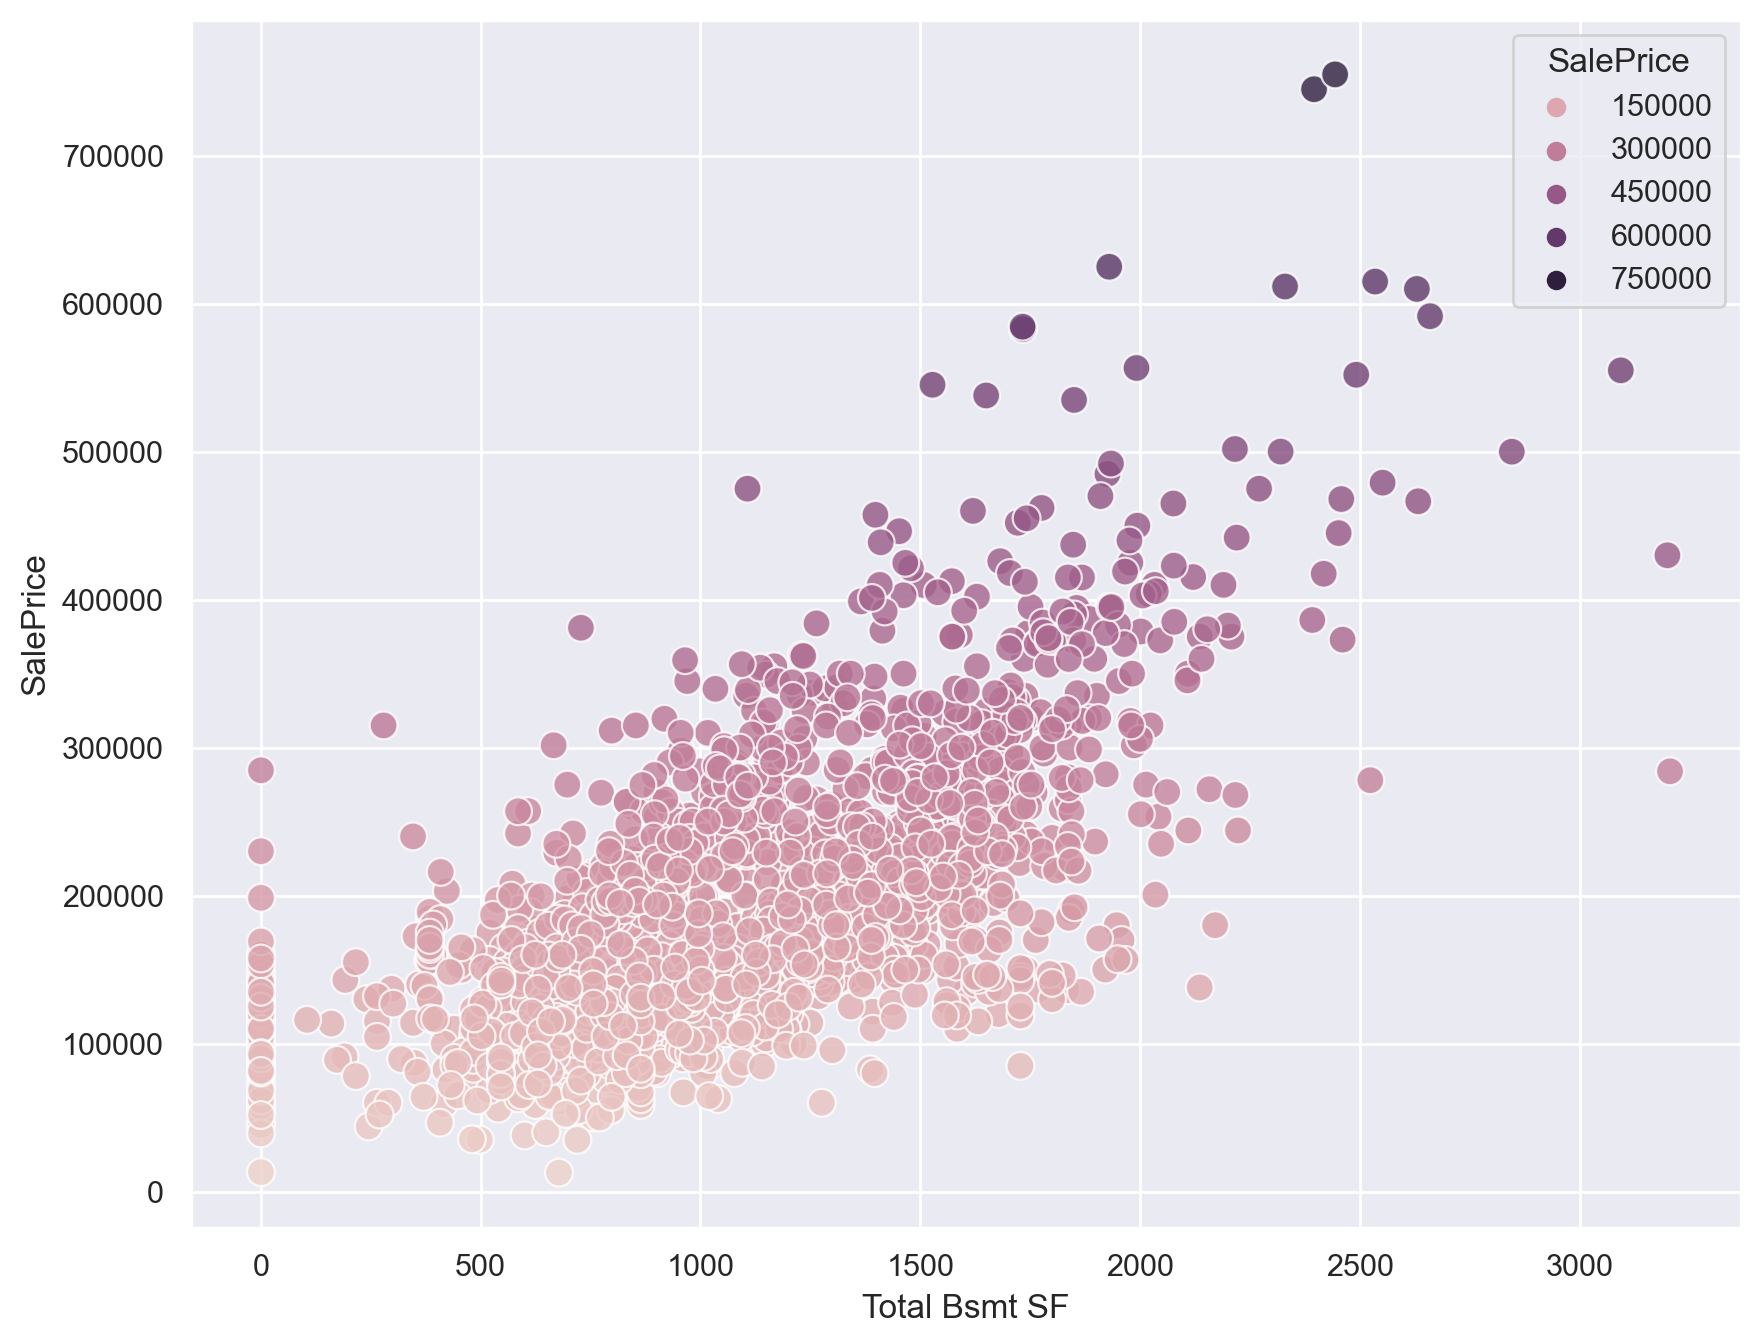

In [72]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=df,hue='SalePrice',alpha=0.8,s=100)

From the last comparison plots it seems the GrLivArea and TotalBsmtSF both seem to be in a linear relation with SalePrice.

<h2 id="Trends-+-seasonality">Trends + seasonality</h2>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

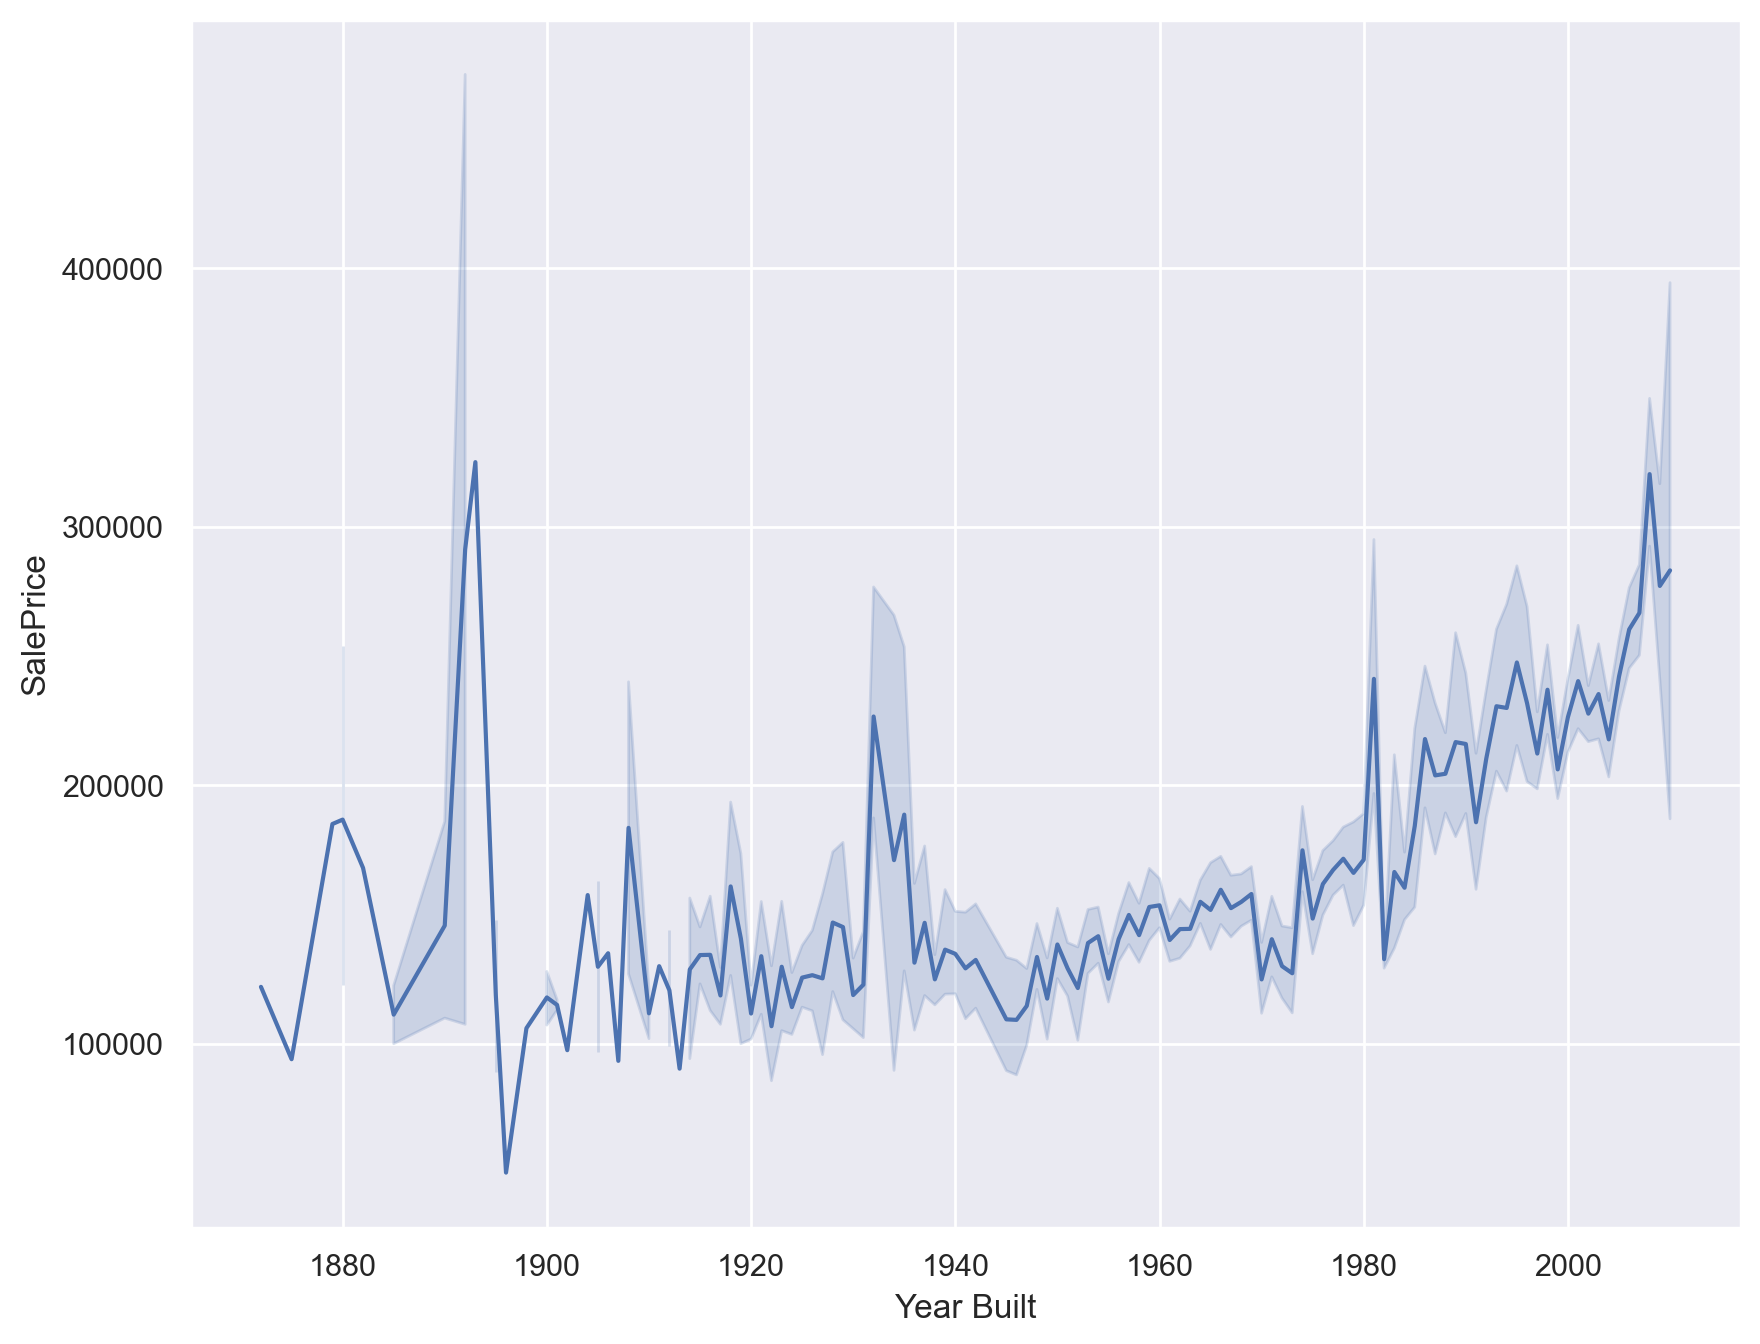

In [92]:
plt.figure(figsize=(10,8),dpi=200)
sns.lineplot(data=df, x="Year Built", y="SalePrice")

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

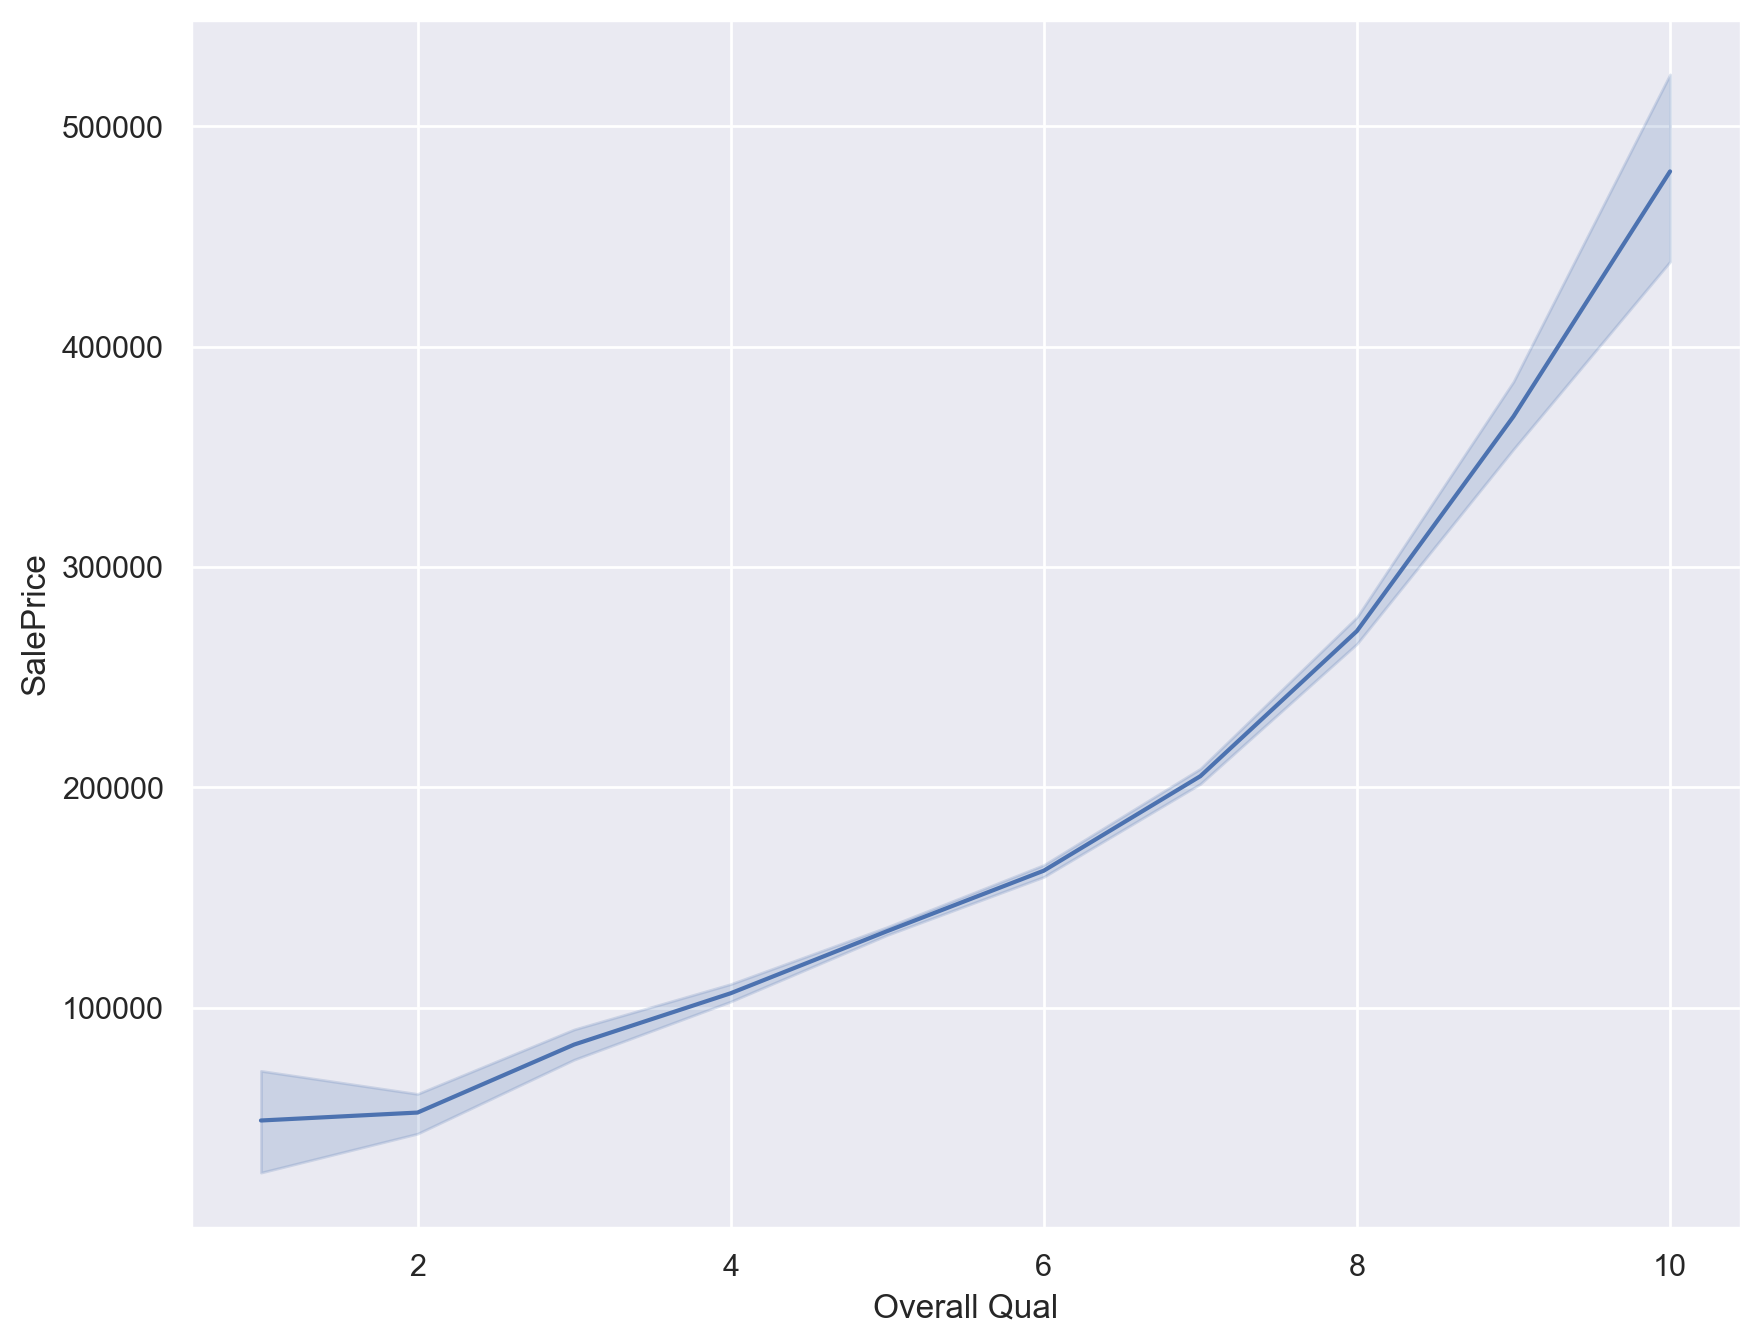

In [93]:
plt.figure(figsize=(10,8),dpi=200)
df['Overall Qual'] = df['Overall Qual'].apply(int)
sns.lineplot(data=df, x="Overall Qual",y="SalePrice")

Both of those plots show the same trends as previosly identified.

<h2 id="Trends-+-seasonality">Search for normality</h2>
<div style="margin-top:10px;"><a href="#Table-of-contents" style="padding:5px;color:#7aa05d;border-radius:0.25rem;border:1px solid #7aa05d;text-decoration:none;">Back to table of contents</a></div>

When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this. In this notebook I'm going to check just the univariate normality for the sales price as learned from the previous notebook. By solveing normality, we avoid a lot of other problems (e.g. heteroscedacity).

During the distribution chapter I have allready seen the distribution and concluded that the data is not normal. Additionally, I will make a normal probability plot were in the best outcome the distribution should closely follow the diagonal that represents the normal distribution.

((array([-3.49509636, -3.25092949, -3.11588156, ...,  3.11588156,
          3.25092949,  3.49509636]),
  array([ 12789,  13100,  34900, ..., 625000, 745000, 755000], dtype=int64)),
 (74892.68374660071, 180815.53743589742, 0.9358754996468981))

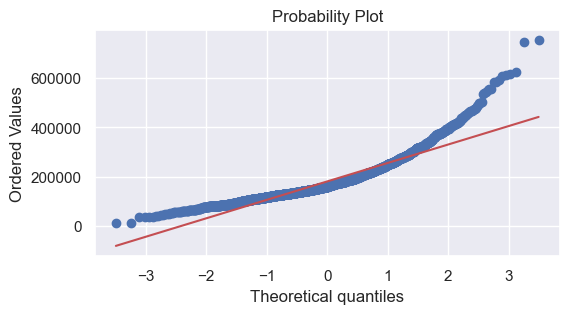

In [6]:
plt.figure(figsize=(6,3),dpi=100)
stats.probplot(df['SalePrice'], plot=plt)

As expected the data does not follow the diagonal. A good way to fix this problem is by applying a simple log transformation

In [7]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])

((array([-3.49509636, -3.25092949, -3.11588156, ...,  3.11588156,
          3.25092949,  3.49509636]),
  array([ 9.45634071,  9.48036751, 10.46024211, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.4052654868421476, 12.02094137698884, 0.9925882386502588))

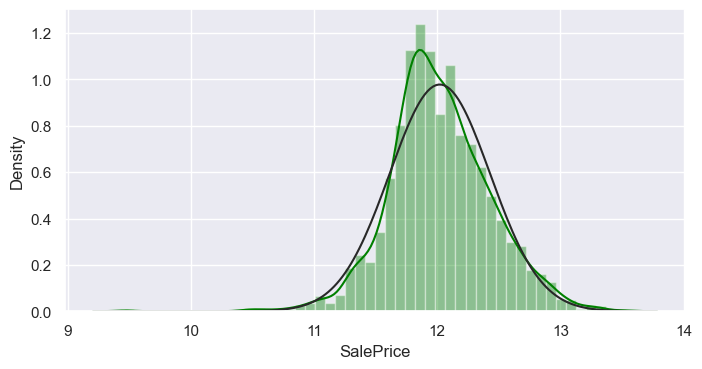

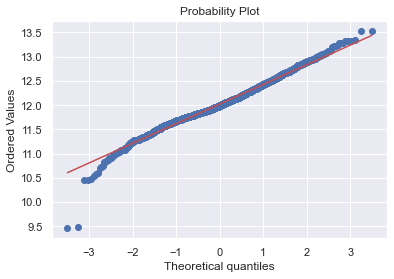

In [16]:
plt.figure(figsize=(8,4),dpi=100)
#transformed histogram and normal probability plot
sns.distplot(df['SalePrice'],
            color='green',
            fit=norm)
fig = plt.figure()
stats.probplot(df['SalePrice'], plot=plt)

Great the issue is now solved and the data looks much more nice. The next step is to do the same for all the other selected variables.

((array([-3.49509636, -3.25092949, -3.11588156, ...,  3.11588156,
          3.25092949,  3.49509636]),
  array([ 334,  407,  438, ..., 3820, 4316, 4476], dtype=int64)),
 (480.30592009207066, 1495.883076923077, 0.9751101844345994))

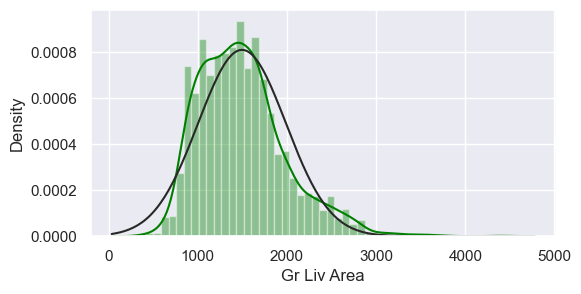

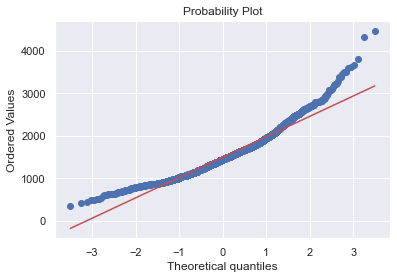

In [18]:
plt.figure(figsize=(6,3),dpi=100)
#transformed histogram and normal probability plot
sns.distplot(df['Gr Liv Area'],
            color='green',
            fit=norm)
fig = plt.figure()
stats.probplot(df['Gr Liv Area'], plot=plt)

As with the sale price I can see that the data shape is skewed, so I will apply thr same fix.

In [20]:
df['Gr Liv Area'] = np.log(df['Gr Liv Area'])

((array([-3.49509636, -3.25092949, -3.11588156, ...,  3.11588156,
          3.25092949,  3.49509636]),
  array([5.81114099, 6.00881319, 6.08221891, ..., 8.2480057 , 8.37008433,
         8.40648507])),
 (0.322163973713848, 7.258734660456663, 0.9986195898091135))

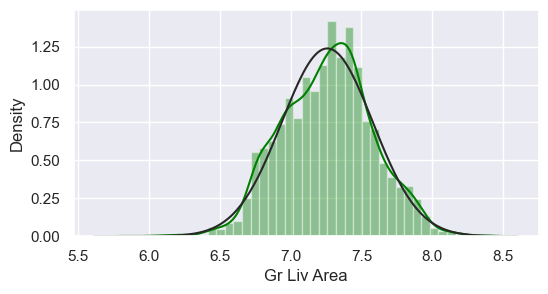

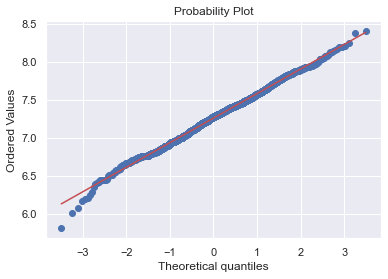

In [21]:
plt.figure(figsize=(6,3),dpi=100)
#transformed histogram and normal probability plot
sns.distplot(df['Gr Liv Area'],
            color='green',
            fit=norm)
fig = plt.figure()
stats.probplot(df['Gr Liv Area'], plot=plt)

Great lets move to the next one...

((array([-3.49509636, -3.25092949, -3.11588156, ...,  3.11588156,
          3.25092949,  3.49509636]),
  array([   0.,    0.,    0., ..., 3094., 3200., 3206.])),
 (417.66579368911005, 1047.7241025641026, 0.9869215549366939))

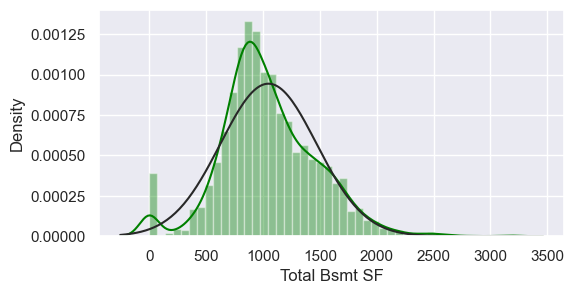

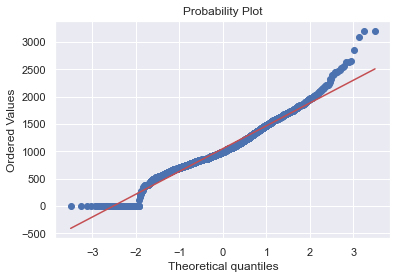

In [23]:
plt.figure(figsize=(6,3),dpi=100)
#transformed histogram and normal probability plot
sns.distplot(df['Total Bsmt SF'],
            color='green',
            fit=norm)
fig = plt.figure()
stats.probplot(df['Total Bsmt SF'], plot=plt)

<p>From the plots it looks like Total Bsmt SF has some zeroes. This doesn't go well with log transformation so I'll have to do something about it.</p>
<p>From the data challenge I learned that in order to apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero.</p>


In [25]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['Total Bsmt SF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['Total Bsmt SF']>0,'HasBsmt'] = 1

In [27]:
#transform data
df.loc[df['HasBsmt']==1,'Total Bsmt SF'] = np.log(df['Total Bsmt SF'])

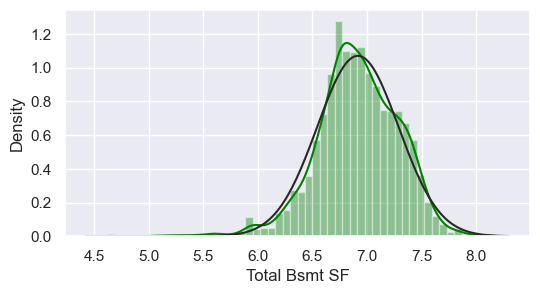

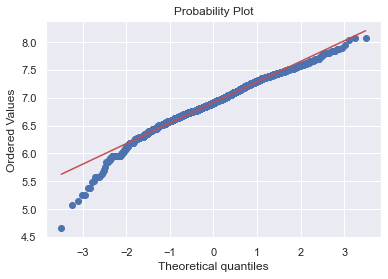

In [29]:
plt.figure(figsize=(6,3),dpi=100)
#histogram and normal probability plot
sns.distplot(df[df['Total Bsmt SF']>0]['Total Bsmt SF'], fit=norm, color="green");
fig = plt.figure()
res = stats.probplot(df[df['Total Bsmt SF']>0]['Total Bsmt SF'], plot=plt)

Looks to me that the problem was solved.